In [1]:
import pandas as pd 
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dff = df.copy()

In [4]:
dff = dff[['Name','Sex','Age','Fare','Pclass','Survived']]
dff.head()

,Name,Sex,Age,Fare,Pclass,Survived
0,"Braund, Mr. Owen Harris",male,22.0,7.2500,3,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,1
2,"Heikkinen, Miss. Laina",female,26.0,7.9250,3,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,1
4,"Allen, Mr. William Henry",male,35.0,8.0500,3,0


In [5]:
dff.isna().sum()

Name          0
Sex           0
Age         177
Fare          0
Pclass        0
Survived      0
dtype: int64

In [6]:
int(dff['Age'].mean())

29

In [7]:
dff = dff.fillna({'Age':int(dff['Age'].mean())})
dff.isna().sum()

Name        0
Sex         0
Age         0
Fare        0
Pclass      0
Survived    0
dtype: int64

In [9]:
dff = dff.fillna({'Age': int(dff['Age'].mean())})
dff.isna().sum()

Name        0
Sex         0
Age         0
Fare        0
Pclass      0
Survived    0
dtype: int64

In [10]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
Fare        891 non-null float64
Pclass      891 non-null int64
Survived    891 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


## Using CAT.CODES

In [59]:
dff['Sex'] = dff['Sex'].astype('category')

In [11]:
#dff['Sex'] = dff['Sex'].cat.codes
dff.head()

,Name,Sex,Age,Fare,Pclass,Survived
0,"Braund, Mr. Owen Harris",male,22.0,7.2500,3,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,1
2,"Heikkinen, Miss. Laina",female,26.0,7.9250,3,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,1
4,"Allen, Mr. William Henry",male,35.0,8.0500,3,0


In [14]:
df3 = df.copy()
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Using LabelEncoder

In [12]:
from sklearn.preprocessing import LabelEncoder

lbl_maker = LabelEncoder()

In [15]:
df3['Sex'] = lbl_maker.fit_transform(df3['Sex'])
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [16]:
dfff = dff[['Sex','Age','Survived']]
dfff[0:10]

,Sex,Age,Survived
0,male,22.0,0
1,female,38.0,1
2,female,26.0,1
3,female,35.0,1
4,male,35.0,0
5,male,29.0,0
6,male,54.0,0
7,male,2.0,0
8,female,27.0,1
9,female,14.0,1


In [19]:
df2 = dfff['Survived'].value_counts()
df2.index

Int64Index([0, 1], dtype='int64')

In [32]:
import seaborn as sns

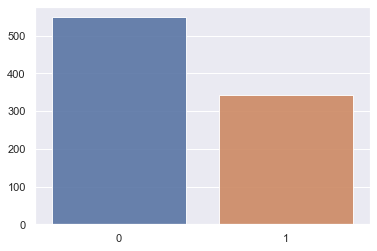

In [38]:
sns.set(style="darkgrid")
sns.barplot(df2.index,df2.values, alpha = 0.9)

## Using Replace 

In [41]:
dfff.head()

,Sex,Age,Survived
0,male,22.0,0
1,female,38.0,1
2,female,26.0,1
3,female,35.0,1
4,male,35.0,0


In [17]:
from word2number import w2n

In [45]:
dfff.Sex = dfff.Sex.replace({'male':'1','female':'0'}).copy()
dfff

,Sex,Age,Survived
0,1,22.0,0
1,0,38.0,1
2,0,26.0,1
3,0,35.0,1
4,1,35.0,0
...,...,...,...
886,1,27.0,0
887,0,19.0,1
888,0,29.0,0
889,1,26.0,1


## Using Pandas.getdummies()

In [70]:
df4 = df.copy()
df4.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
df4_onehot = pd.get_dummies(df4,columns=['Sex'],prefix=['Sex'])
df4_onehot.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


7.82 ms ± 191 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


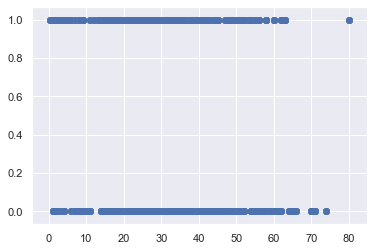

In [55]:
import time
%timeit plt.scatter(dfff['Age'],dfff['Survived']) 

In [46]:
model1 = linear_model.LinearRegression()
model1.fit(dfff[['Sex','Age']],dfff.Survived)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
model1.predict([[0,40]])

array([0.73184055])

In [72]:
df = pd.read_csv("hp_train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [81]:
get_nan = lambda x : x[x.isna().any(axis=1)]
df5_nan = get_nan(df).copy()
df5_nan[0:20]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [41]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [82]:
dff = df[['LotArea','SalePrice']]
dff.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [64]:
nans = lambda df: df[df.isna().any(axis=1)]
nans(dff)

,LotArea,SalePrice
53,NaN,385000
249,NaN,277000
313,NaN,375000
335,NaN,228950
384,NaN,240000
451,NaN,280000
457,NaN,256000
706,NaN,302000
769,NaN,538000
1298,NaN,160000


In [68]:
dff = dff.drop(nans(dff.index),inplace=True)
nans(dff)


AxisError: axis 1 is out of bounds for array of dimension 1

In [83]:
dff.isna().sum()

LotArea      0
SalePrice    0
dtype: int64

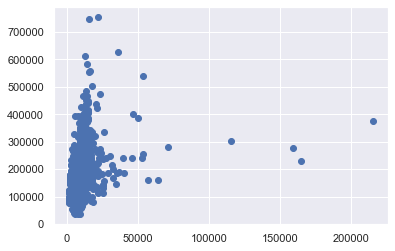

In [84]:
plt.scatter(dff.LotArea,dff.SalePrice)

In [53]:
len(dff)

1460

Text(0.5, 1.0, 'Housing Prices')

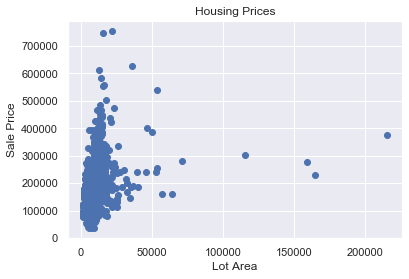

In [85]:
%matplotlib inline
plt.scatter(dff.LotArea,dff.SalePrice)
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('Housing Prices')

In [55]:
max(dff.LotArea)

215245

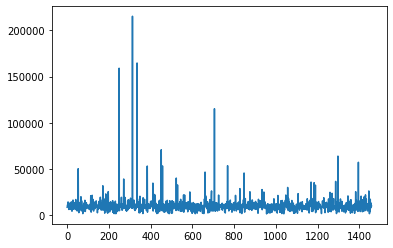

In [56]:
plt.plot(dff.LotArea)

In [60]:
dff['LotArea'] = dff[df['LotArea'] <= 50000]

C:\Users\alevi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Housing Prices')

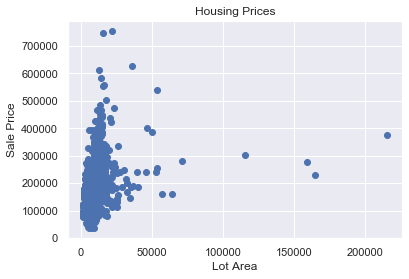

In [86]:
%matplotlib inline
plt.scatter(dff.LotArea,dff.SalePrice)
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('Housing Prices')

In [87]:
model = linear_model.LinearRegression()
model.fit(dff[['LotArea']],dff.SalePrice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
dff = dff.interpolate()

In [88]:
dff['LotArea'].isna().sum()

0

In [89]:
model.predict([[10000]])

array([179835.87141395])

In [90]:
model.coef_

array([2.09997195])

In [91]:
model.intercept_

158836.1518968766

In [92]:
6.39824181 * 10000 + 117891.9843560553

181874.4024560553

In [80]:
ttest =pd.read_csv('hp_test.csv')
ttest

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [81]:
test = ttest[['LotArea']]
test.head()

,LotArea
0,11622
1,14267
2,13830
3,9978
4,5005


In [82]:
pprice = model.predict(test)

In [83]:
test['PredictedSalePrice'] = pprice
test.head()

C:\Users\alevi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LotArea,PredictedSalePrice
0,11622,183242.025920
1,14267,188796.451732
2,13830,187878.763989
3,9978,179789.672031
4,5005,169346.511515


In [84]:
test[0:10]

,LotArea,PredictedSalePrice
0,11622,183242.025920
1,14267,188796.451732
2,13830,187878.763989
3,9978,179789.672031
4,5005,169346.511515
5,10000,179835.871414
6,7980,175593.928072
7,8402,176480.116235
8,10176,180205.466477
9,8400,176475.916291


In [85]:
test.tail()

,LotArea,PredictedSalePrice
1454,1936,162901.697595
1455,1894,162813.498773
1456,20000,200835.590931
1457,10441,180761.959045
1458,9627,179052.581876


In [81]:
test.to_csv("predictedprices.csv")

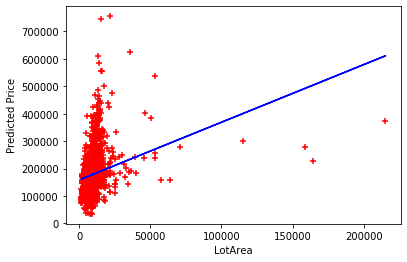

In [86]:
plt.xlabel('LotArea')
plt.ylabel('Predicted Price')
plt.scatter(dff.LotArea,dff.SalePrice, color= 'red', marker='+')
plt.plot(dff.LotArea,model.predict(dff[['LotArea']]),color='blue')

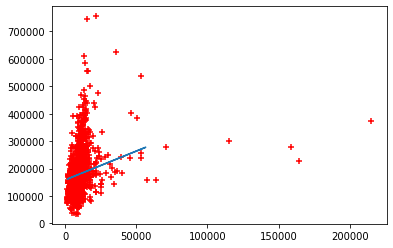

In [87]:
plt.scatter(dff.LotArea,dff.SalePrice, color= 'red', marker='+')
plt.plot(test.LotArea,test.PredictedSalePrice)

In [91]:
capita  = pd.read_csv("capita.csv")
capita

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [92]:
reg = linear_model.LinearRegression()
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
reg.fit(capita[['year']],capita['per capita income (US$)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
reg.predict([[2020]])

array([41288.69409442])

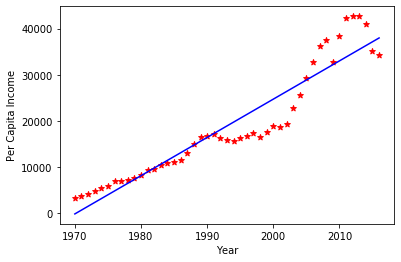

In [95]:
plt.xlabel('Year')
plt.ylabel('Per Capita Income')
plt.scatter(capita[['year']],capita['per capita income (US$)'], color = 'red', marker='*')
plt.plot(capita['year'],reg.predict(capita[['year']]), color='blue')

In [96]:
reg.predict([[2018]])

array([39631.76394397])

In [97]:
reg.predict([[2017]])

array([38803.29886875])

In [98]:
!pip install word2number

  Created wheel for word2number: filename=word2number-1.1-cp37-none-any.whl size=5591 sha256=cf4fea34f2d7134e95ef495ad201a23ba6c028e6f6c3b47ed08b993c67922722
  Stored in directory: C:\Users\alevi\AppData\Local\pip\Cache\wheels\46\2f\53\5f5c1d275492f2fce1cdab9a9bb12d49286dead829a4078e0e
Successfully built word2number


ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\Users\alevi\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _dep_map
    return self.__dep_map
  File "C:\Users\alevi\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\alevi\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3003, in _parsed_pkg_info
    return self._pkg_info
  File "C:\Users\alevi\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\alevi\Anaconda3\lib\site-packages\pip\_inter

In [20]:
hiringdata = pd.read_csv("hiring.csv")
hiringdata

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [21]:
hiringdata['experience'].isna().sum()

2

In [22]:
hiringdata.experience = hiringdata.experience.fillna("thirteen")
hiringdata

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,thirteen,8.0,9,50000
1,thirteen,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [23]:
hiringdata =hiringdata.fillna({'test_score(out of 10)':int(hiringdata['test_score(out of 10)'].mean())})
hiringdata

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,thirteen,8.0,9,50000
1,thirteen,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [24]:
from word2number import w2n

In [25]:
type(hiringdata.experience[0])

str

In [26]:
hiringdata.experience = hiringdata.experience.apply(w2n.word_to_num)
hiringdata

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,13,8.0,9,50000
1,13,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [130]:
linear = linear_model.LinearRegression()
linear.fit(hiringdata[['experience','test_score(out of 10)','interview_score(out of 10)']],hiringdata['salary($)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
linear.predict([[4,9,9]])

array([65253.64331371])

In [132]:
linear.predict([[2,9,6]])

array([69191.59703354])

In [133]:
linear.predict([[12,10,10]])

array([57760.23109965])

## Gradient Descent

#### * Mean squared error is the most common Cost Function
#### * Partial derivatives gives us a direction 

In [143]:
df5 = df[['LotArea','YearBuilt','SalePrice']].copy()
df5.head()

,LotArea,YearBuilt,SalePrice
0,8450,2003,208500
1,9600,1976,181500
2,11250,2001,223500
3,9550,1915,140000
4,14260,2000,250000


In [141]:
df5.isna().sum()

LotArea      0
SalePrice    0
dtype: int64

In [142]:
len(df5)

1460

In [151]:
import urllib.request

In [1]:
import math
import numpy as np
import progressbar
import pandas as pd
from sklearn.linear_model import LinearRegression

In [5]:
#path = urllib.request.urlopen("https:\\github.com\codebasics\py\blob\master\ML\3_gradient_descent\Exercise\test_scores.csv")
gd_ex = pd.read_csv("gdexer.csv") 
gd_ex

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [54]:
def summer(x,y):
    curr_m = curr_b = 0
    iterations = 1000
    n = len(gd_ex)
    lr = 0.0002
    cost_prev = 0
    with progressbar.ProgressBar(max_value=1000000) as bar:
        for i in range(iterations):
            y_pred = curr_m * x + curr_b
            print(y_pred)
            cost = (1/n) * sum([val**2 for val in (y - y_pred)])
        return cost

In [3]:
def gradient(x,y):
    curr_m = curr_b = 0
    iterations = 5
    n = len(gd_ex)
    lr = 0.0002
    cost_prev = 0
    with progressbar.ProgressBar(max_value=1000000) as bar:
        for i in range(iterations):
            y_pred = curr_m * x + curr_b
            print(x)
            print(y_pred)
            print(y - y_pred)
            cost = (1/n) * sum([val**2 for val in (y - y_pred)])
            print(cost)
            md = -(2/n) * sum(x*(y - y_pred))
            bd =  (2/n) * sum(y - y_pred)
            print(md,bd)
            curr_m = curr_m - lr * md
            curr_b = curr_b - lr * bd
            print(curr_m,curr_b)
            if math.isclose(cost,cost_prev, rel_tol= 1e-10):
                break
            cost_prev = cost
            print(cost_prev)
            #bar.update(i)
            print('m value is {} , b value is {} , cost for each iteration is {}, iteration sequence {}'.format(curr_m,curr_b,cost,i))
        return curr_m, curr_b

In [4]:
x = np.array(gd_ex.math)
y = np.array(gd_ex.cs)

In [77]:
(np.sum([x[0] * -83.98116**2,x[0] *  -42.7602**2,x[0] *   -93.06772**2,x[0] *  -58.45724**2,x[0] *  -75.24084**2,
         x[0] *  -44.91168**2, x[0] *  -62.56544**2,
x[0] *  -39.21464**2,x[0] *  -62.5438**2,x[0] *   -59.52216**2]))*0.0002

-764.4316630712347

In [70]:
m ,b = gradient(x,y)
print("The value of m is {} , The value of b  is {}".format(m,b))

100% (1000000 of 1000000) |##############| Elapsed Time: 0:00:00 ETA:  00:00:00


[92 56 88 70 80 49 65 35 66 67]
[0 0 0 0 0 0 0 0 0 0]
[98 68 81 80 83 52 66 30 68 73]
5199.1
-9891.800000000001 139.8
1.9783600000000003 -0.027960000000000002
5199.1
m value is 1.9783600000000003 , b value is -0.027960000000000002 , cost for each iteration is 5199.1, iteration sequence 0
[92 56 88 70 80 49 65 35 66 67]
[181.98116 110.7602  174.06772 138.45724 158.24084  96.91168 128.56544
  69.21464 130.5438  132.52216]
[-83.98116 -42.7602  -93.06772 -58.45724 -75.24084 -44.91168 -62.56544
 -39.21464 -62.5438  -59.52216]
4154.519907995842
8835.577024000002 -124.45297600000004
0.21124459519999994 -0.0030694047999999946
4154.519907995842
m value is 0.21124459519999994 , b value is -0.0030694047999999946 , cost for each iteration is 4154.519907995842, iteration sequence 1
[92 56 88 70 80 49 65 35 66 67]
[19.43143335 11.82662793 18.58645497 14.78405226 16.89649821 10.34791576
 13.72782928  7.39049143 13.93907388 14.15031847]
[78.56856665 56.17337207 62.41354503 65.21594774 66.10350179 41.6

In [13]:
def predict_using_sklean():
    df = pd.read_csv("gdexer.csv")
    r = LinearRegression()
    r.fit(df[['math']],df.cs)
    return r.coef_, r.intercept_

In [14]:
m_sklearn, b_sklearn = predict_using_sklean()
print("Using sklearn: Coef {} Intercept {}".format(m_sklearn,b_sklearn))

Using sklearn: Coef [1.01773624] Intercept 1.9152193111569176


In [48]:
import time
import progressbar

with progressbar.ProgressBar(max_value=10) as bar:
    for i in range(10):
        time.sleep(0.2)
        #bar.update(i)

100% (10 of 10) |########################| Elapsed Time: 0:00:00 ETA:  00:00:00


In [5]:
df = pd.read_csv("gdexer.csv")
modelp = LinearRegression()
modelp.fit(df[['math']],df.cs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
modelp.predict([[96]])

array([99.61789815])

In [27]:
import pickle

In [86]:
with open('samplemodel','wb') as file:
    pickle.dump(modelp,file)

In [28]:
with open('samplemodel','rb') as file:
    mode1 = pickle.load(file)

In [31]:
mode1.predict([[100]])

array([103.6888431])

In [34]:
from sklearn.externals import joblib

C:\Users\alevi\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [92]:
joblib.dump(modelp,'joblib_test')

['joblib_test']

In [35]:
kp = joblib.load('joblib_test')

In [36]:
kp.predict([[100]])

array([103.6888431])

In [15]:
gd_ex

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [16]:
modelp.score(df[['math']],df.cs)

0.8990561457295679

In [37]:
cp = pd.read_csv('carprices.csv')
cp

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

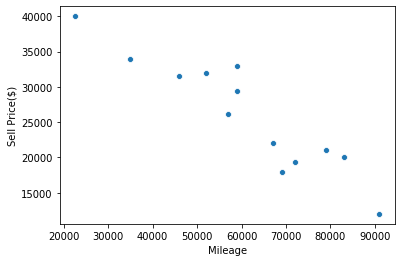

In [40]:
sns.scatterplot(cp.Mileage,cp['Sell Price($)'])

In [37]:
sns.barplot?

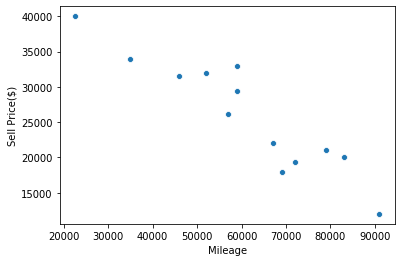

In [42]:
sns.scatterplot(cp.Mileage,cp['Sell Price($)'])

In [38]:
sns.barplot(cp.Mileage,cp['Sell Price($)'])

ValueError: Could not interpret input 'smoker'

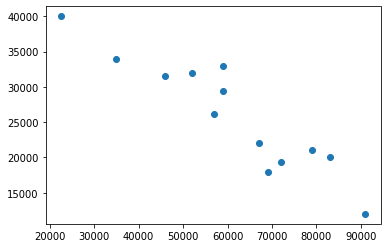

In [43]:
plt.scatter(cp.Mileage,cp['Sell Price($)'])

In [21]:
cp_dum = pd.get_dummies(cp,columns=['Car Model'],prefix=['CarModel'])
cp_dum

,Mileage,Sell Price($),Age(yrs),CarModel_Audi A5,CarModel_BMW X5,CarModel_Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [28]:
cp_X = cp_dum.drop(columns=['Sell Price($)'],axis='columns')
cp_X

,Mileage,Age(yrs),CarModel_Audi A5,CarModel_BMW X5,CarModel_Mercedez Benz C class
0,69000,6,0,1,0
1,35000,3,0,1,0
2,57000,5,0,1,0
3,22500,2,0,1,0
4,46000,4,0,1,0
5,59000,5,1,0,0
6,52000,5,1,0,0
7,72000,6,1,0,0
8,91000,8,1,0,0
9,67000,6,0,0,1


In [34]:
cp

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [26]:
cp_y = cp_dum['Sell Price($)']
cp_y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [30]:
lm = LinearRegression()
lm.fit(cp_X,cp_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
lm.predict([[45000,4,0,0,1]])

array([36991.31721061])

In [33]:
lm.predict([[86000,7,0,1,0]])

array([11080.74313219])

In [35]:
lm.score(cp_X,cp_y)

0.9417050937281082

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()

In [42]:
le_dum = cp.copy()
le_dum['Car Model'] = le.fit_transform(le_dum['Car Model'])
le_dum

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [47]:
X = le_dum[['Car Model','Mileage','Age(yrs)']].values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [49]:
y = le_dum['Sell Price($)'].values
y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [50]:
lm1 = LinearRegression()
lm1.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
lm1.predict([[0,50000,5]])

array([29326.09632092])

In [3]:
cp_tt = cp[['Mileage','Age(yrs)','Sell Price($)']]
cp_tt

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,29400
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [4]:
X = cp_tt[['Mileage','Age(yrs)']]
y = cp_tt['Sell Price($)']

In [1]:
import numpy as np
import pandas as pd
import math
import progressbar
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [62]:
X_train

,Mileage,Age(yrs)
2,57000,5
1,35000,3
12,59000,5
5,59000,5
9,67000,6
7,72000,6
10,83000,7
6,52000,5
8,91000,8
0,69000,6


In [63]:
X_test

,Mileage,Age(yrs)
3,22500,2
11,79000,7
4,46000,4


In [64]:
y_train

2     26100
1     34000
12    33000
5     29400
9     22000
7     19300
10    20000
6     32000
8     12000
0     18000
Name: Sell Price($), dtype: int64

In [65]:
y_test

3     40000
11    21000
4     31500
Name: Sell Price($), dtype: int64

In [9]:
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
lm2.predict(X_test)

array([42198.99580667, 18242.48510263, 32343.21341867])

In [70]:
lm2.score(X_test,y_test)

0.9274122548129002

In [27]:
def gradient_descent(x,y):
    m = b = 0
    iteration = 10
    n =len(x)
    initial_cost = 0
    lr = 0.0001
    for i in range(iteration):
        y_pred =  m * x + b
        cost = (1/n) * sum([val**2 for val in (y - y_pred)])
        md = - (2/n) * sum(x * (y - y_pred))
        bd =  (2/n) * sum(y - y_pred)
        m = m - lr * md
        b = b - lr * bd
        if math.isclose(cost,initial_cost,rel_tol=1e-200):
            break
        initial_cost = cost
        
        print(" The value of m is {} , The Value of b is {} , The cost is {} , The iterating sequence is {}".format(m,b,cost,i))
    return m,b
    

In [30]:
x = np.array(gd_ex.math)
y = np.array(gd_ex.cs)

In [31]:
gradient_descent(x,y)

 The value of m is 0.9891800000000002 , The Value of b is -0.013980000000000001 , The cost is 5199.1 , The iterating sequence is 0
 The value of m is 1.0419911488 , The Value of b is -0.0147473512 , The cost is 46.54681699895993 , The iterating sequence is 1
 The value of m is 1.044810953728192 , The Value of b is -0.014809298922272 , The cost is 31.860325940448504 , The iterating sequence is 2
 The value of m is 1.0449617949719414 , The Value of b is -0.01483358644024781 , The cost is 31.818469437254294 , The iterating sequence is 3
 The value of m is 1.044970144207349 , The Value of b is -0.014855863576710721 , The cost is 31.81835502950436 , The iterating sequence is 4
 The value of m is 1.0449708860092157 , The Value of b is -0.014878033622815883 , The cost is 31.818359600768062 , The iterating sequence is 5
 The value of m is 1.0449712216648912 , The Value of b is -0.014900198192457324 , The cost is 31.818364511274122 , The iterating sequence is 6
 The value of m is 1.044971535640

(1.044972161225132, -0.014966692477081569)